In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
import sys
def custom_excepthook(type, value, traceback):
    pass
sys.excepthook = custom_excepthook

In [3]:
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dxdt = [a*x1 - R*x1*x2 - a*x1*x4, R*x1*x2 - a*x2*x4 - x2, b*x3 - a*c*x3*x4, d*(x1 + x2 + x3)*x4 - d*x4]
    return dxdt


In [4]:
def euler_method(f, x0, t, args):
    dt = t[1] - t[0]
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt * np.array(f(x[i-1], t[i-1], *args))
    return x


In [5]:
def rk4_method(f, x0, t, args):
    dt = t[1] - t[0]
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        k1 = dt * np.array(f(x[i-1], t[i-1], *args))
        k2 = dt * np.array(f(x[i-1] + k1/2, t[i-1] + dt/2, *args))
        k3 = dt * np.array(f(x[i-1] + k2/2, t[i-1] + dt/2, *args))
        k4 = dt * np.array(f(x[i-1] + k3, t[i-1] + dt, *args))
        x[i] = x[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return x


## Probando diferencias entre el metodo Runge-Kutta 4, Euler y el odeint de scipy
> Notese que la  grafica del Runge-Kutta se superpone a la de odeint

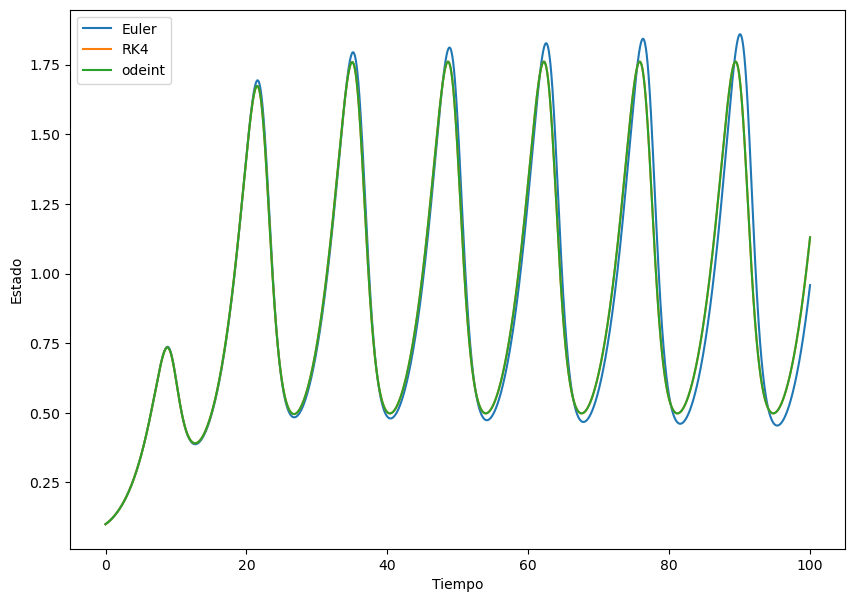

In [6]:
from scipy.integrate import odeint

# Parámetros y condiciones iniciales
a, b, c, d, R = 0.3, 0.3, 2, 0.8, 0.1
x0 = [0.1, 0.3, 0.3, 0.3]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

# Resuelve el sistema con los tres métodos
x_euler = euler_method(sistema, x0, t, (a, b, c, d, R))
x_rk4 = rk4_method(sistema, x0, t, (a, b, c, d, R))
x_odeint = odeint(sistema, x0, t, args=(a, b, c, d, R))

# Compara los resultados
plt.figure(figsize=(10, 7))
plt.plot(t, x_euler[:, 0], label='Euler')
plt.plot(t, x_rk4[:, 0], label='RK4')
plt.plot(t, x_odeint[:, 0], label='odeint')
plt.xlabel('Tiempo')
plt.ylabel('Estado')
plt.legend()
plt.show()


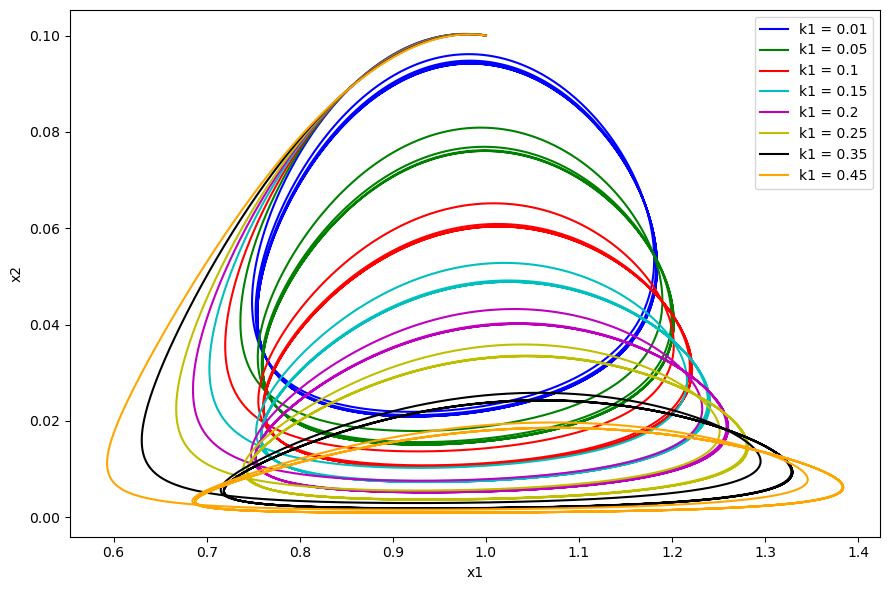

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = odeint(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 0], x[:, 1], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

plt.tight_layout()
plt.show()



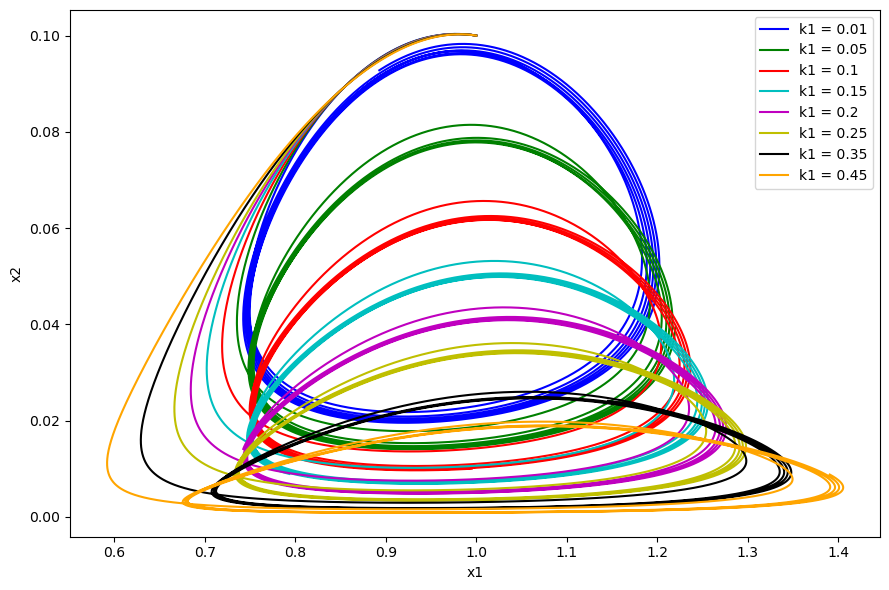

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def sistema(x, t, a, b, c, d, R):
    x1, x2, x3, x4 = x
    dx1 = a*x1 - R*x1*x2 - a*x1*x4
    dx2 = R*x1*x2 - a*x2*x4 - x2
    dx3 = b*x3 - a*c*x3*x4
    dx4 = d*(x1 + x2 + x3)*x4 - d*x4
    return [dx1, dx2, dx3, dx4]

# Parámetros
a = 0.3
b = 0.4
c = 2
d = 0.3
R = 1.3

# Condiciones iniciales
k1_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45]
initial_conditions = [[1, 0.1, k1, 0.9] for k1 in k1_values]

# Tiempo de integración
T = 100
dt = 0.01
t = np.arange(0, T, dt)

fig, ax = plt.subplots(figsize=(9, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i, x0 in enumerate(initial_conditions):
    # Resolvemos el sistema de ecuaciones
    x = euler_method(sistema, x0, t, args=(a, b, c, d, R))
    
    # Gráfica de fase
    ax.plot(x[:, 0], x[:, 1], color=colors[i], label=f'k1 = {k1_values[i]}')

# Label the axes and create a legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

plt.tight_layout()
plt.show()

